**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading Dataset**

In [ ]:

fd=pd.read_csv('creditcard.csv')

In [ ]:
fd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**Information**


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283145 entries, 0 to 283144
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   283145 non-null  int64  
 1   Time    283145 non-null  float64
 2   V1      283145 non-null  float64
 3   V2      283145 non-null  float64
 4   V3      283145 non-null  float64
 5   V4      283145 non-null  float64
 6   V5      283145 non-null  float64
 7   V6      283145 non-null  float64
 8   V7      283145 non-null  float64
 9   V8      283145 non-null  float64
 10  V9      283145 non-null  float64
 11  V10     283145 non-null  float64
 12  V11     283145 non-null  float64
 13  V12     283145 non-null  float64
 14  V13     283145 non-null  float64
 15  V14     283145 non-null  float64
 16  V15     283144 non-null  float64
 17  V16     283144 non-null  float64
 18  V17     283144 non-null  float64
 19  V18     283144 non-null  float64
 20  V19     283144 non-null  float64
 21  V20     28

**Null Values**

In [ ]:
fd.isnull().sum()

index     0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Descriptive Statistics**

In [ ]:
fd.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
fd.shape

(283144, 32)

In [ ]:
fd.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
index,283144.0,141571.500000,81736.776647,0.000000,70785.750000,141571.500000,212357.250000,283143.000000
Time,283144.0,94360.198652,47255.911145,0.000000,54019.000000,84393.500000,138822.250000,171399.000000
V1,283144.0,-0.000496,1.958665,-56.407510,-0.920451,0.018481,1.314418,2.454930
V2,283144.0,-0.002173,1.651810,-72.715728,-0.599794,0.064548,0.802042,22.057729
V3,283144.0,0.004484,1.515267,-48.325589,-0.883903,0.184552,1.030213,9.382558


In [ ]:
fd.describe()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000,283144.000000
mean,141571.500000,94360.198652,-0.000496,-0.002173,0.004484,0.000743,-0.001607,0.000792,-0.001127,-0.000249,-0.000187,0.000184,0.002143,-0.001555,-0.000030,0.000628,0.001111,0.000117,0.000183,-0.000562,-0.000105,0.000091,-0.000076,-0.000503,-0.000212,-0.000086,0.000775,-0.000009,-0.000072,0.000023,88.456790,0.001738
std,81736.776647,47255.911145,1.958665,1.651810,1.515267,1.415902,1.379161,1.331398,1.235182,1.195088,1.099066,1.088101,1.020944,1.000624,0.995906,0.958952,0.915964,0.876620,0.850016,0.838437,0.814198,0.771861,0.735626,0.725335,0.625197,0.605799,0.520999,0.482381,0.403745,0.330306,249.743529,0.041649
min,0.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,70785.750000,54019.000000,-0.920451,-0.599794,-0.883903,-0.848807,-0.693753,-0.767289,-0.554711,-0.208136,-0.643809,-0.534783,-0.760348,-0.407418,-0.648877,-0.424484,-0.582054,-0.468385,-0.483408,-0.498850,-0.456698,-0.211656,-0.228221,-0.541851,-0.161945,-0.354572,-0.316244,-0.327180,-0.070815,-0.052878,5.640000,0.000000
50%,141571.500000,84393.500000,0.018481,0.064548,0.184552,-0.018654,-0.056572,-0.272919,0.038915,0.022593,-0.052015,-0.092452,-0.029859,0.138843,-0.013900,0.050947,0.049711,0.066512,-0.065386,-0.004212,0.003694,-0.062257,-0.029544,0.006549,-0.011438,0.041129,0.018047,-0.052484,0.001421,0.011345,22.000000,0.000000
75%,212357.250000,138822.250000,1.314418,0.802042,1.030213,0.745606,0.609916,0.399617,0.569262,0.327225,0.597639,0.454749,0.741522,0.617873,0.662508,0.493254,0.650975,0.523768,0.399718,0.500390,0.459253,0.133405,0.185975,0.527208,0.147276,0.439107,0.351315,0.241331,0.090903,0.078218,77.500000,0.000000
max,283143.000000,171399.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


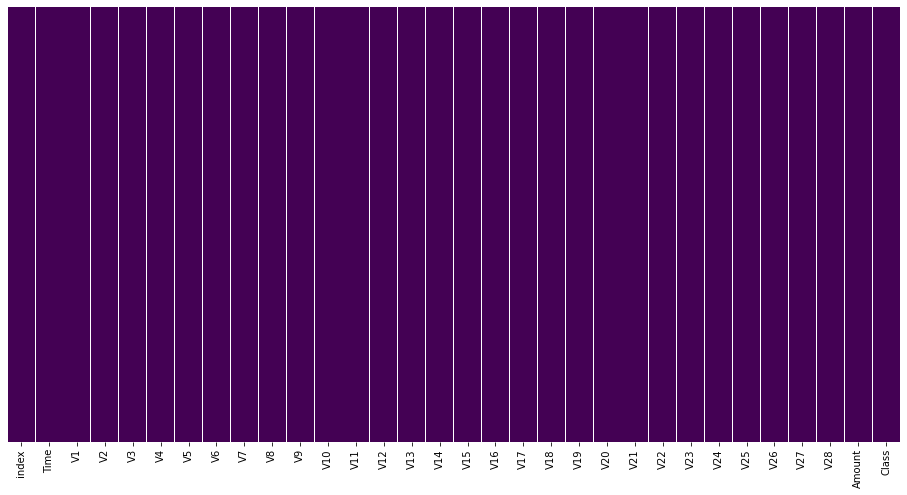

In [ ]:
sns.heatmap(fd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Fraud Cases And Normal Cases**

In [ ]:
fraud_cases=len(fd[fd['Class']==1])

In [ ]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [ ]:
non_fraud_cases=len(fd[fd['Class']==0])

In [ ]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 282652


In [ ]:
fraud=fd[fd['Class']==1]

In [ ]:
normal=fd[fd['Class']==0]

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    282652.000000
mean         88.398035
std         249.727771
min           0.000000
25%           5.690000
50%          22.000000
75%          77.350000
max       25691.160000
Name: Amount, dtype: float64

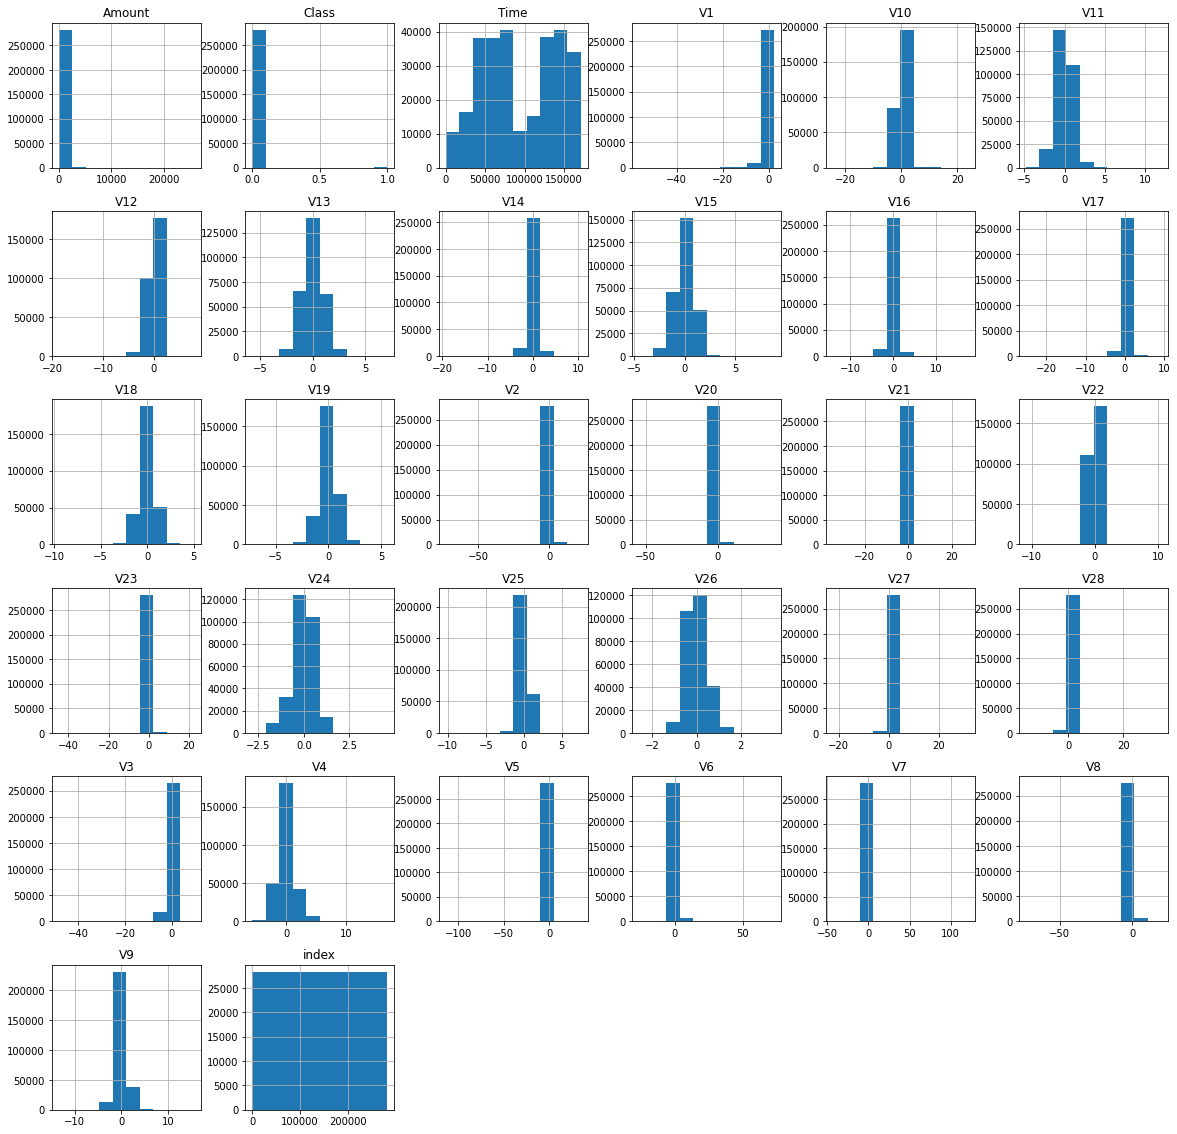

In [ ]:
fd.hist(figsize = (20, 20))
plt.show()

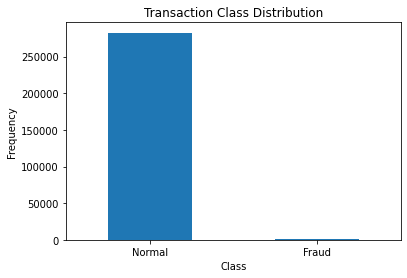

In [ ]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(fd['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

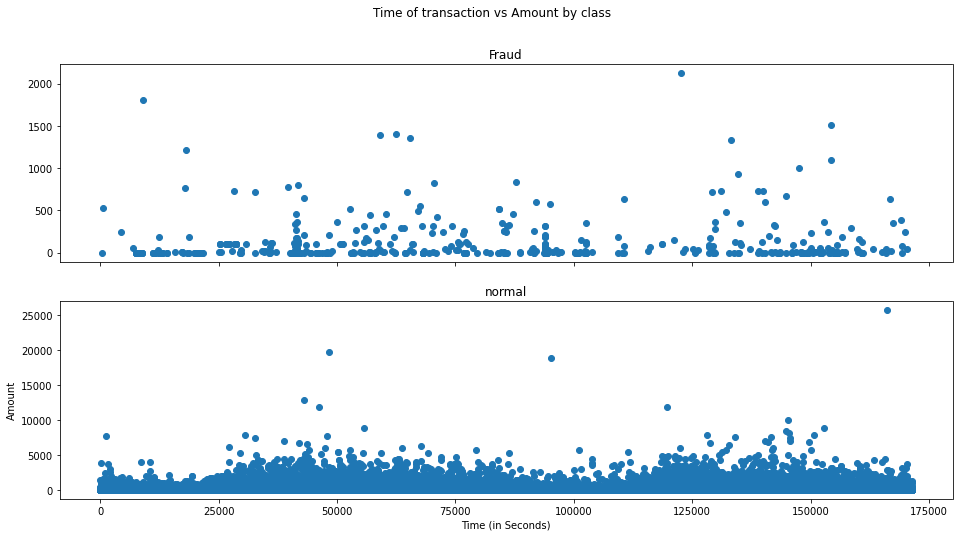

In [ ]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

**Correlation**

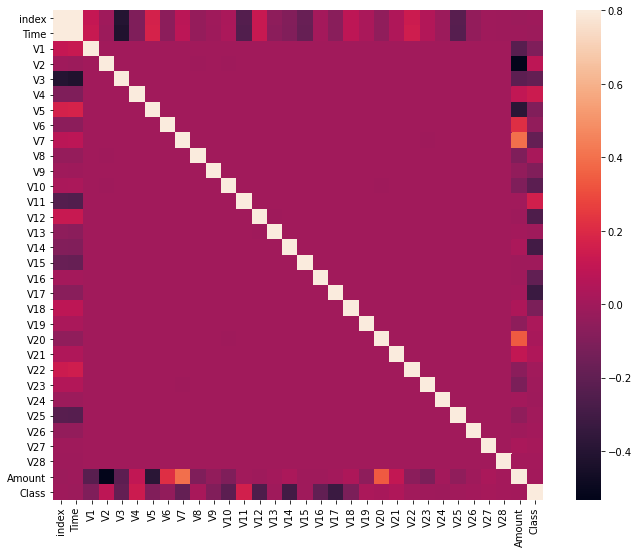

In [ ]:
corrmat = fd.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
nan_value=float("NaN")
fd.replace("",nan_value,inplace=True)
fd.dropna(subset=['V15'],inplace=True)

**Building Models**

*Model 1*

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=fd.drop(['Class'],axis=1)

In [ ]:
y=fd['Class']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
model=rfc.fit(X_train,y_train)

In [ ]:
prediction=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,prediction)

0.9995173290638538

*Model  2*

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X1=fd.drop(['Class'],axis=1)

In [ ]:
y1=fd['Class']

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [ ]:
lr=LogisticRegression()

In [ ]:
model2=lr.fit(X1_train,y1_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
prediction2=model2.predict(X1_test)

In [ ]:
accuracy_score(y1_test,prediction2)

0.9989051610472782

*Model 3*

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X2=fd.drop(['Class'],axis=1)

In [ ]:
y2=fd['Class']

In [ ]:
dt=DecisionTreeRegressor()

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)

In [ ]:
model3=dt.fit(X2_train,y2_train)

In [ ]:
prediction3=model3.predict(X2_test)

In [ ]:
accuracy_score(y2_test,prediction3)

0.9991759276699943